## Support Vector Regressor

Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Dataset

In [8]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [9]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling


In [10]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
X = scx.fit_transform(X)
print(X)
scy = StandardScaler()
y = scy.fit_transform(y)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR model on whole dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predicting a new result

In [12]:
y_pred = scy.inverse_transform(regressor.predict(scx.transform([[6.5]])))
y_pred

array([170370.0204065])

Visualising the SVR result

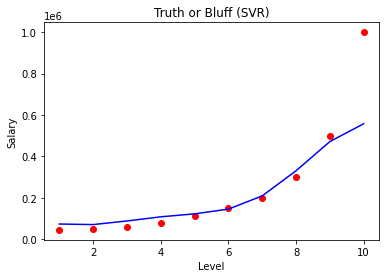

In [13]:
plt.scatter(scx.inverse_transform(X),scy.inverse_transform(y),color='red')
plt.plot(scx.inverse_transform(X),scy.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Visualising the SVR result (for higher resolution and smoother curve

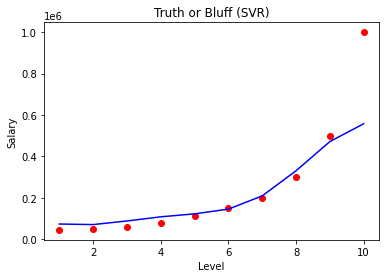

In [14]:
X_grid = np.arange(min(scx.inverse_transform(X)),max(scx.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(scx.inverse_transform(X),scy.inverse_transform(y),color='red')
plt.plot(scx.inverse_transform(X),scy.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()